In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
nfl_scores = pd.read_html('https://www.pro-football-reference.com/boxscores/game-scores.htm')

In [3]:
nfl_scores[0]

,Rk,Score,PtsW,PtsL,PtTot,PD,Count,Unnamed: 7,Last Game
0,1,20-17,20,17,37,3,260,all games,"Dallas Cowboys vs. Oakland Raiders, December 1..."
1,2,27-24,27,24,51,3,202,all games,"Denver Broncos vs. Seattle Seahawks, September..."
2,3,17-14,17,14,31,3,195,all games,"Washington Redskins vs. Seattle Seahawks, Nove..."
3,4,23-20,23,20,43,3,179,all games,"Pittsburgh Steelers vs. Cincinnati Bengals, De..."
4,5,13-10,13,10,23,3,161,all games,"Tennessee Titans vs. Denver Broncos, December ..."
5,6,24-17,24,17,41,7,158,all games,"Oakland Raiders vs. New York Giants, December ..."
6,7,24-21,24,21,45,3,146,all games,"Atlanta Falcons vs. Tampa Bay Buccaneers, Dece..."
7,8,24-14,24,14,38,10,137,all games,"Pittsburgh Steelers vs. New York Giants, Decem..."
8,9,16-13,16,13,29,3,136,all games,"Arizona Cardinals vs. Indianapolis Colts, Sept..."
9,10,17-10,17,10,27,7,135,all games,"New York Giants vs. Los Angeles Rams, October ..."


In [4]:
pw_pl = nfl_scores[0].values[:,2:4].astype(int)

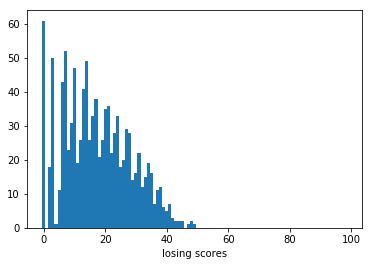

In [5]:
ack = plt.hist(pw_pl[:,1], bins=np.arange(100)-.5)
plt.xlabel('losing scores')

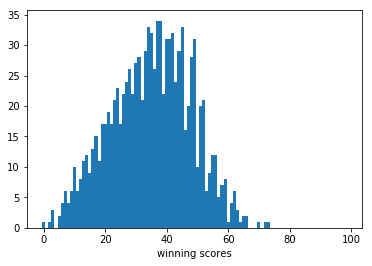

In [6]:
ack = plt.hist(pw_pl[:,0], bins=np.arange(100)-.5)
plt.xlabel('winning scores')

(10, 30)

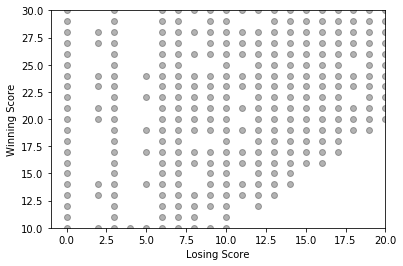

In [7]:
plt.plot(pw_pl[:,1], pw_pl[:,0], 'ko', alpha=.3)
plt.xlabel('Losing Score')
plt.ylabel('Winning Score')
plt.xlim([-1,20])
plt.ylim([10,30])

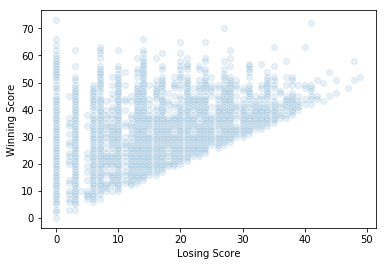

In [8]:
plt.scatter(pw_pl[:,1], pw_pl[:,0], alpha=.1)
plt.xlabel('Losing Score')
plt.ylabel('Winning Score')

In [9]:
xedges = np.arange(80)-.5
yedges = np.arange(80)-.5
H, xedges, yedges = np.histogram2d(pw_pl[:,1], pw_pl[:,0], bins=(xedges, yedges))

In [10]:
H=H.T

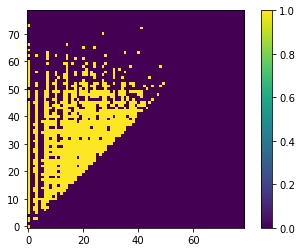

In [11]:
plt.imshow(H, interpolation='nearest', origin='low',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()

In [12]:
H.max()

1.0

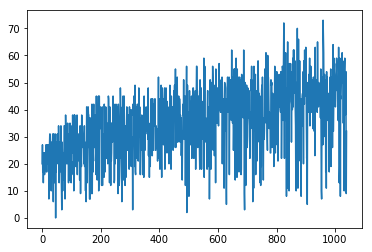

In [13]:
plt.plot(pw_pl[:,0])

In [14]:
pw_pl[:,0]

array([20, 27, 17, ..., 54,  9, 32])

In [15]:
values,counts = np.unique(pw_pl[:,0],return_counts=True)
ind=np.argmax(counts)
print('most common winning score=', values[ind])


most common winning score= 37


In [31]:
good = np.where(pw_pl[:,0] == 28)[0]

In [32]:
good.size

26

In [33]:
np.sort(pw_pl[good,1])

array([ 0,  2,  3,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28])

In [19]:
merged = pw_pl[:,0]+pw_pl[:,1]*1000

In [20]:
merged.size, np.unique(merged).size

(1040, 1040)

In [21]:
xedges = np.arange(0, 80, 3)-.5
yedges = np.arange(0, 80,3 )-.5
H, xedges, yedges = np.histogram2d(pw_pl[:,1], pw_pl[:,0], bins=(xedges, yedges))
H=H.T

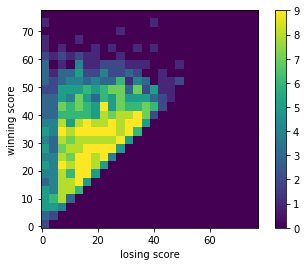

In [22]:
plt.imshow(H, interpolation='nearest', origin='low',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.colorbar()
plt.xlabel('losing score')
plt.ylabel('winning score')